# Trendanalysis of Papers in the Domain of Reinforcement Learning and Mechanical Engineering

In [312]:
import litstudy
from matplotlib import pyplot as plt
import pandas as pd
import glob
import urllib.request
import json
import time
import re
import numpy as np

In [313]:
# Set your Springer API Key here!
SPRINGER_API_KEY = None

## The Data

### Platforms

The data is collected from the following platforms:
 - [IEEE Xplore](https://ieeexplore.ieee.org/)
 - [Science Direct](https://www.sciencedirect.com/)
 - [ACM Digital Library](https://dl.acm.org/)
 - [Springer Link](https://link.springer.com/)

### Search Query

The used search query is inspired by [Panzer and Bender](http://dx.doi.org/10.1080/00207543.2021.1973138) and consists of an algorithmic keyword and general keywords.

 - Algorithmic Keyword: Reinforcement Learning
 - General Keywords: Assembly OR Automation OR Industry OR Industrie OR Manufacturing OR Production

Additionally, to the general keywords used by [Panzer and Bender](http://dx.doi.org/10.1080/00207543.2021.1973138) the keyword "Industrie" is added to the search query to detect all papers in the domain of Industrie 4.0.

The search query was so structured, that the algorithmic keywords must be present in the title of the paper and the general keywords must be present somewhere in the metadata of the paper.

### Results

The data was downloaded on the 22nd of October 2023. The queries and the amount of papers is shown in the following list:

 - [IEEE Xplore](https://ieeexplore.ieee.org/search/searchresult.jsp?action=search&newsearch=true&matchBoolean=true&queryText=(%22Document%20Title%22:Reinforcement%20Learning)%20AND%20(%22All%20Metadata%22:Assembly%20OR%20%22All%20Metadata%22:Automation%20OR%20%22All%20Metadata%22:Industry%20OR%20%22All%20Metadata%22:Manufacturing%20OR%20%22All%20Metadata%22:Production%20OR%20%22All%20Metadata%22:Industrie)%20NOT%20(%22Document%20Title%22:Survey%20OR%20%22Document%20Title%22:Review)&highlight=true&returnFacets=ALL&returnType=SEARCH&matchPubs=true&rowsPerPage=100&pageNumber=1): 3743 results
 - [ACM Digital Library](https://dl.acm.org/action/doSearch?fillQuickSearch=false&target=advanced&expand=dl&field1=Title&text1=%22reinforcement+learning%22&field2=AllField&text2=Assembly+OR+Automation+OR+Industry+OR+Industrie+OR+Manufacturing+OR+Production&field3=Title&text3=NOT+%28Survey+OR+Review%29): 1279 results
 - [Science Direct](https://www.sciencedirect.com/search?title=%22Reinforcement%20Learning%22&qs=Assembly%20OR%20Automation%20OR%20Industry%20OR%20Industrie%20OR%20Manufacturing%20OR%20Production): 2015 results
 - [Springer Link](https://link.springer.com/search?dc.title=%22Reinforcement+learning%22&query=%28Assembly+OR+Automation+OR+Industrie+OR+Industry+OR+Manufacturing+OR+Production%29&facet-start-year=2023&showAll=true&facet-end-year=2020): 2254 results

The exported data can be found in the folder [data](./data).

## Loading the Data

[litstudy](https://doi.org/10.1016/j.softx.2022.101207) is a python package for the analysis of scientific literature. It is used to load, merge and preprocess the data.

In [314]:
# IEEE
docs_ieee = None
for filename in glob.glob("data/ieee_*.csv"):
    tmp_docs = litstudy.load_csv(filename)
    docs_ieee = tmp_docs if not docs_ieee else docs_ieee | tmp_docs
print(f"Loaded {len(docs_ieee)} documents from IEEE")

Loaded 3743 documents from IEEE


In [315]:
# ACM
docs_acm = None
for filename in glob.glob("data/acm_*.bib"):
    tmp_docs = litstudy.load_bibtex(filename)
    docs_acm = tmp_docs if not docs_acm else docs_acm | tmp_docs
print(f"Loaded {len(docs_acm)} documents from ACM")

Loaded 1279 documents from ACM


In [316]:
# Science Direct
docs_scidir = None
for filename in glob.glob("data/ScienceDirect_*.bib"):
    tmp_docs = litstudy.load_bibtex(filename)
    docs_scidir = tmp_docs if not docs_scidir else docs_scidir | tmp_docs
print(f"Loaded {len(docs_scidir)} documents from Science Direct")

Loaded 2015 documents from Science Direct


In [317]:
# Springer Link
docs_springer = None
for filename in glob.glob("data/springer_*.csv"):
    tmp_docs = litstudy.load_csv(filename)
    docs_springer = tmp_docs if not docs_springer else docs_springer | tmp_docs
print(f"Loaded {len(docs_springer)} documents from Springer Link")

Loaded 2254 documents from Springer Link


In [319]:
if not SPRINGER_API_KEY:
    raise Exception("Please provide a Springer API key!")

springer_error_count = 0

for d in docs_springer:
    springer_url = f"http://api.springernature.com/meta/v2/json?q=doi:{d.id.doi}&api_key={SPRINGER_API_KEY}"
    try:
        response = urllib.request.urlopen(springer_url)
        data = response.read().decode("utf-8")
        json_data = json.loads(data)
        d.fields["keywords"] = "Keywords"
        d.record["Keywords"] = ", ".join(json_data["records"][0]["keyword"])
        time.sleep(1.0)
    except Exception as e:
        springer_error_count += 1
        
print(f"Loaded keywords for {len(docs_springer) - springer_error_count} documents from Springer Link")

Loaded keywords for 2023 documents from Springer Link


In [320]:
# Merge all data
docs_total = docs_ieee | docs_acm | docs_scidir | docs_springer

print(f"Total number of documents: {len(docs_total)} (from {len(docs_ieee) + len(docs_acm) + len(docs_scidir) + len(docs_springer)} total documents)")

Total number of documents: 9240 (from 9291 total documents)


In [321]:
docs_total_time_filtered = docs_total.filter_docs(lambda d: d.publication_year is not None and d.publication_year >= 2013)
print(f"Total number of documents from 2013 to 2022: {len(docs_total_time_filtered)}")

Total number of documents from 2013 to 2022: 8261


In [322]:
for year in range(2013, 2024):
    print(f"Year {year}: {len(docs_total.filter_docs(lambda d: d.publication_year == year))} documents")

Year 2013: 81 documents
Year 2014: 99 documents
Year 2015: 94 documents
Year 2016: 93 documents
Year 2017: 168 documents
Year 2018: 336 documents
Year 2019: 650 documents
Year 2020: 1056 documents
Year 2021: 1397 documents
Year 2022: 2012 documents
Year 2023: 2237 documents


## Basic Analysis

First of all, let's do some basic analysis on the full dataset.

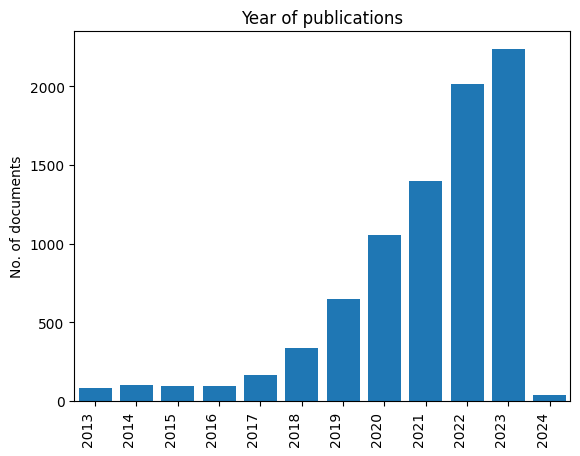

In [323]:
litstudy.plot_year_histogram(docs_total_time_filtered, vertical=True);

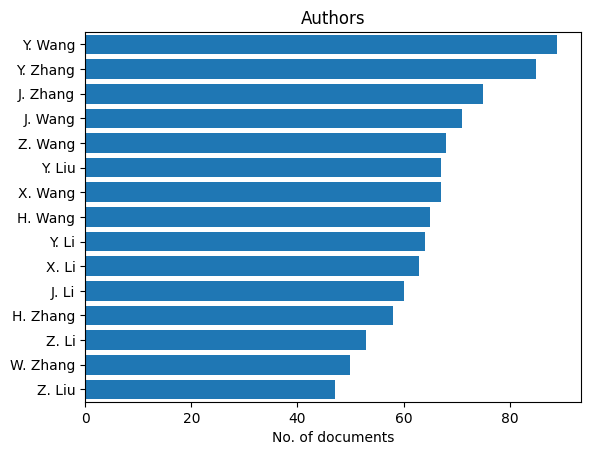

In [324]:
litstudy.plot_author_histogram(docs_total_time_filtered, limit=15);

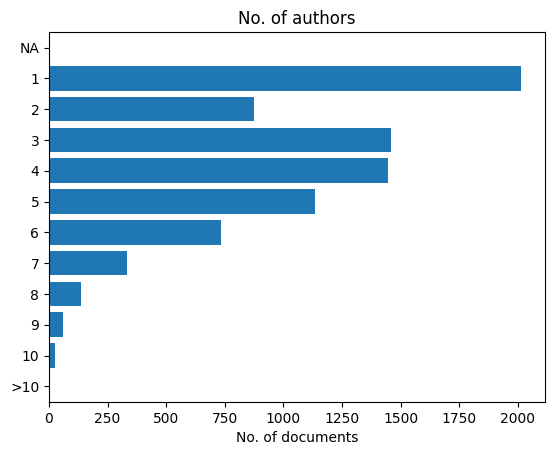

In [325]:
litstudy.plot_number_authors_histogram(docs_total_time_filtered);

## Clustering

To cluster the papers two features were chosen:
 1. The RL algorithm used in the paper
 2. The discipline (in the domain of production system) of the paper

## RL Algorithm

To detect the RL algorithm the classification of RL algorithms from [Khan et al.](http://dx.doi.org/10.1109/ACCESS.2020.3027152) is used. The classification is shown in the following list:

 - Model-free RL
   - Value-based RL
     - SARSA
     - Q-Learning
     - DQN
     - C51
   - Policy-based RL
     - REINFORCE
     - A2c/A3c
     - DDPG
     - TRPO
     - PPO
 - Model-based RL
   - Learn the model
     - MBVE
     - World models
     - I2A
   - Given the model
     - Alpha Zero

For each specific RL algorithm keywords are defined. The keywords are used to detect the algorithm in the title, the abstract and the keywords of the paper.

In [326]:
algorithms = {
    "SARSA": ["sarsa", "state action reward state action", "state-action-reward-state-action"],
    "Q-learning" : ["q-learning", "q learning"],
    "DQN" : ["dqn", "deep q-network"],
    "C51" : ["c51"],
    "REINFORCE" : ["reinforce"],
    "A2c/A3c" : ["a2c", "a3c"],
    "DDPG" : ["ddpg", "deep deterministic policy gradient"],
    "TRPO" : ["trpo", "trust region policy optimization"],
    "PPO" : ["ppo", "proximal policy optimization"],
    "MBVE": ["mbve", "model-based value estimation", "model based value estimation", "modelbased value estimation"],
    "World models": ["world model", "world models"],
    "I2A": ["i2a", "imagination-augmented agents", "imagination augmented agents"],
    "Alpha Zero": ["alpha zero", "alphazero", "alpha-zero"],
}

algorithm_classification = {
    "Model-free RL": ["Double DQN", "Dueling DQN", "SARSA", "Q-learning", "DQN", "C51", "A2c/A3c", "DDPG", "TRPO", "PPO"],
    "Model-based RL": ["MBVE", "World models", "I2A", "Alpha Zero"],
}

## Domain

To classify the paper according to their discipline in the domain of production system, the identified disciplines from [Panzer and Bender](http://dx.doi.org/10.1080/00207543.2021.1973138) are used. They identified the following disciplines:

 - Process control
 - Scheduling
 - Assembly
 - Dispatching
 - Maintenance
 - Energy management
 - Logistics
 - Robotics
 - Quality control
 - Others

In [327]:
disciplines = {
    "Process control": ["process control"],
    "Scheduling": ["scheduling"],
    "Assembly": ["assembly"],
    "Dispatching": ["dispatching"],
    "Maintenance": ["maintenance"],
    "Energy management": ["energy management"],
    "Logistics": ["logistic", "logistics"],
    "Robotics": ["robotics", "robotic", "robot"],
    "Quality control": ["quality control", "quality-control"],
}

Currently, a wrapper is used to combine the litstudy Document with a discipline and an algorithm.

In [328]:
class DocWrapper:
    def __init__(self, doc):
        self.doc = doc
        self.disciplines = set()
        self.algorithms = set()

    def __str__(self):
        return f"{self.doc.title} ({self.doc.year})"

    def cluster_discipline(self):
        for disc, discs in disciplines.items():
            for d in discs:
                if d in self.doc.title.lower() or self.doc.keywords and d in "; ".join(self.doc.keywords).lower():
                    self.disciplines.add(disc)

    def cluster_algorithm(self):
        for alg, algs in algorithms.items():
            for a in algs:
                if a == "ppo":
                    regex_pattern = r"\bPPO\b"
                    if re.search(regex_pattern, self.doc.title) or self.doc.keywords and re.search(regex_pattern, "; ".join(self.doc.keywords)):
                        self.algorithms.add(alg)
                    continue
                if a == "reinforce":
                    regex_pattern = r"\bREINFORCE\b"
                    if re.search(regex_pattern, self.doc.title) or self.doc.keywords and re.search(regex_pattern, "; ".join(self.doc.keywords)):
                        self.algorithms.add(alg)
                    continue
                if a in self.doc.title.lower() or self.doc.keywords and a in "; ".join(self.doc.keywords).lower():
                    self.algorithms.add(alg)

In [329]:
# Start clustering
docs = [DocWrapper(d) for d in docs_total_time_filtered]
for d in docs:
    d.cluster_discipline()
    d.cluster_algorithm()

Now, let's have a look at the disciplines.

In [330]:
disciplines_count = {k: 0 for k in disciplines.keys()}
disciplines_count["Unclassified"] = 0
for d in docs:
    if len(d.disciplines) == 0:
        disciplines_count["Unclassified"] += 1
        continue
    for disc in d.disciplines:
        disciplines_count[disc] += 1
disciplines_count

{'Process control': 58,
 'Scheduling': 496,
 'Assembly': 105,
 'Dispatching': 44,
 'Maintenance': 96,
 'Energy management': 209,
 'Logistics': 26,
 'Robotics': 996,
 'Quality control': 2,
 'Unclassified': 6359}

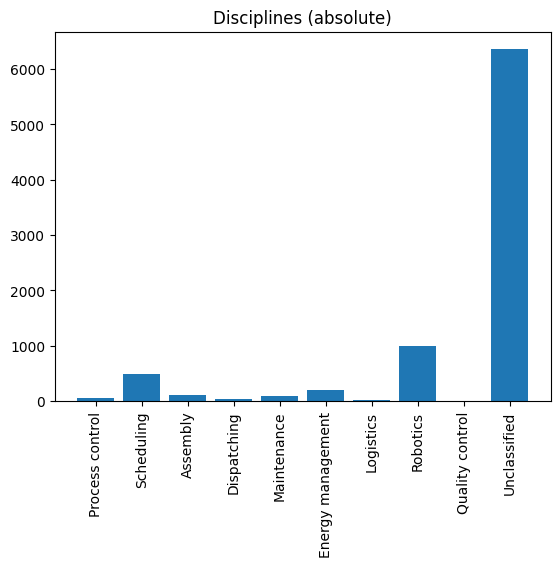

In [331]:
plt.bar(disciplines_count.keys(), disciplines_count.values())
plt.xticks(rotation=90)
plt.title("Disciplines (absolute)");

In [332]:
discipline_classified_docs = len(docs_total_time_filtered) - disciplines_count["Unclassified"]
print(f"Classified {discipline_classified_docs} documents according to their discipline ({discipline_classified_docs / len(docs_total_time_filtered) * 100:.2f}%)")

Classified 1902 documents according to their discipline (23.02%)


In [342]:
disciplines_relative = {k: v / discipline_classified_docs for k, v in {i: j for i, j in disciplines_count.items() if i != "Unclassified"}.items()}

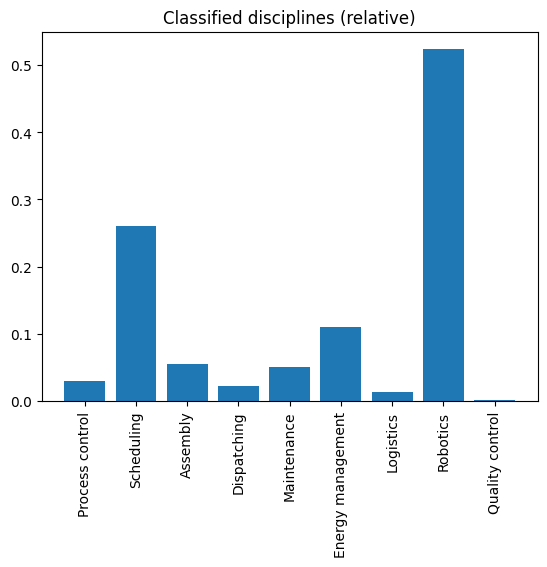

In [343]:
plt.bar(disciplines_relative.keys(), disciplines_relative.values())
plt.xticks(rotation=90)
plt.title("Classified disciplines (relative)");

Now, let's have a look at the algorithms.

In [344]:
algorithms_count = {k: 0 for k in algorithms.keys()}
algorithms_count["Unclassified"] = 0
for d in docs:
    if len(d.algorithms) == 0:
        algorithms_count["Unclassified"] += 1
        continue
    for alg in d.algorithms:
        algorithms_count[alg] += 1
algorithms_count

{'SARSA': 29,
 'Q-learning': 384,
 'DQN': 170,
 'C51': 1,
 'REINFORCE': 2,
 'A2c/A3c': 25,
 'DDPG': 220,
 'TRPO': 2,
 'PPO': 101,
 'MBVE': 0,
 'World models': 5,
 'I2A': 0,
 'Alpha Zero': 2,
 'Unclassified': 7363}

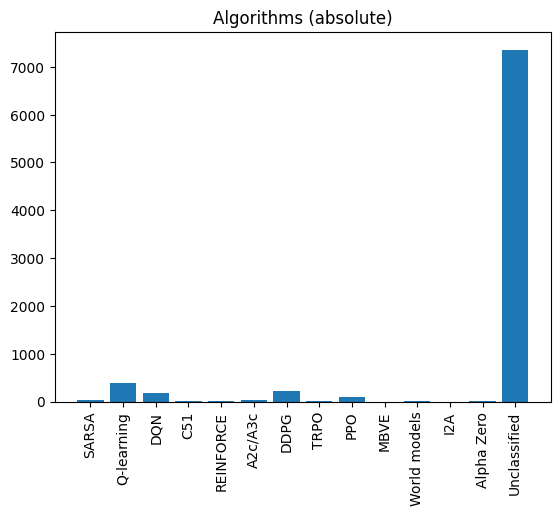

In [345]:
plt.bar(algorithms_count.keys(), algorithms_count.values())
plt.xticks(rotation=90)
plt.title("Algorithms (absolute)");

In [346]:
algorithm_classified_docs = len(docs_total_time_filtered) - algorithms_count["Unclassified"]
print(f"Classified {algorithm_classified_docs} documents ({algorithm_classified_docs / len(docs_total_time_filtered) * 100:.2f}%)")

Classified 898 documents (10.87%)


In [347]:
algorithms_relative = {k: v / algorithm_classified_docs for k, v in {i: j for i, j in algorithms_count.items() if i != "Unclassified"}.items()}

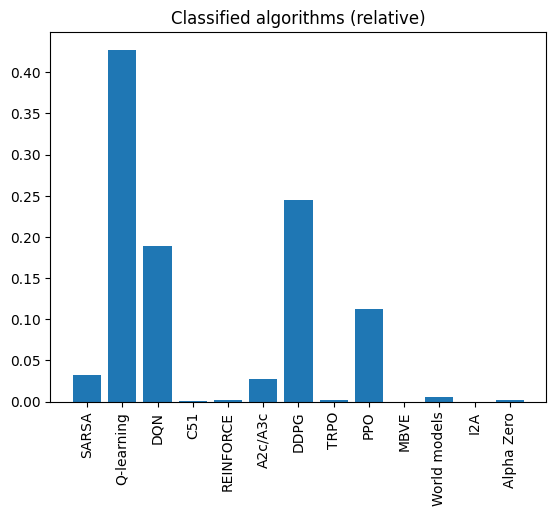

In [348]:
plt.bar(algorithms_relative.keys(), algorithms_relative.values())
plt.xticks(rotation=90)
plt.title("Classified algorithms (relative)");

Next, let's look only on those documents, that are classified in both disciplines and algorithms.

In [340]:
# filter docs if they are classified in both disciplines and algorithms
filtered_docs = list(filter(lambda x: (len(x.algorithms) > 0 and len(x.disciplines) > 0), docs))
print(f"Classified {len(filtered_docs)} documents ({len(filtered_docs) / len(docs_total) * 100:.2f}%)")

Classified 250 documents (2.71%)


In [341]:
filtered_data = {k: {l: 0 for l in disciplines} for k in algorithms}
for d in filtered_docs:
    for alg in d.algorithms:
        for disc in d.disciplines:
            filtered_data[alg][disc] += 1
filtered_data

{'SARSA': {'Process control': 0,
  'Scheduling': 3,
  'Assembly': 0,
  'Dispatching': 0,
  'Maintenance': 0,
  'Energy management': 0,
  'Logistics': 0,
  'Robotics': 2,
  'Quality control': 0},
 'Q-learning': {'Process control': 3,
  'Scheduling': 38,
  'Assembly': 2,
  'Dispatching': 0,
  'Maintenance': 5,
  'Energy management': 16,
  'Logistics': 1,
  'Robotics': 32,
  'Quality control': 0},
 'DQN': {'Process control': 1,
  'Scheduling': 23,
  'Assembly': 3,
  'Dispatching': 2,
  'Maintenance': 6,
  'Energy management': 5,
  'Logistics': 2,
  'Robotics': 20,
  'Quality control': 0},
 'C51': {'Process control': 0,
  'Scheduling': 0,
  'Assembly': 0,
  'Dispatching': 0,
  'Maintenance': 0,
  'Energy management': 0,
  'Logistics': 0,
  'Robotics': 0,
  'Quality control': 0},
 'REINFORCE': {'Process control': 0,
  'Scheduling': 0,
  'Assembly': 0,
  'Dispatching': 0,
  'Maintenance': 0,
  'Energy management': 1,
  'Logistics': 0,
  'Robotics': 0,
  'Quality control': 0},
 'A2c/A3c': {'P

And have a look on what algorithm is used in what discipline.

C:\Users\fhs38061\AppData\Local\Temp\ipykernel_32200\1399811121.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", num_bars)


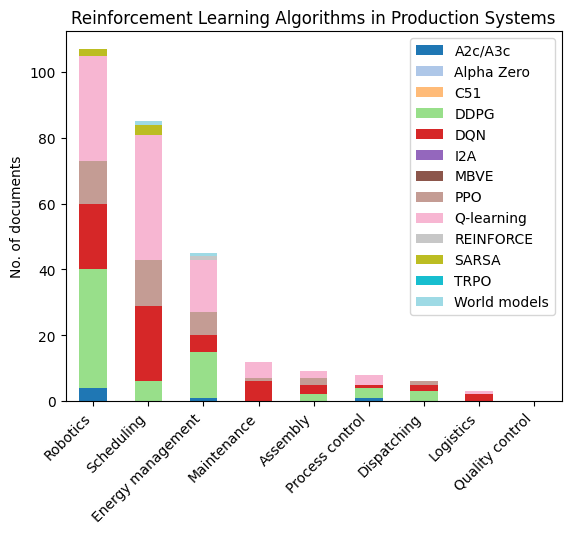

In [350]:
df = pd.DataFrame(filtered_data)

# Sum the values for each row and sort the DataFrame
df["total"] = df.sum(axis=1)
df = df.sort_values(by="total", ascending=False).drop(columns="total")

# Sort columns alphabetically
df = df.reindex(sorted(df.columns), axis=1)

num_bars = 13
colors = plt.cm.get_cmap("tab20", num_bars)
colors = colors(np.arange(num_bars))

ax = df.plot(kind="bar", stacked=True, color=colors)

ax.legend()
plt.title("Reinforcement Learning Algorithms in Production Systems")
plt.ylabel("No. of documents")
plt.xticks(rotation=45, ha="right")

# Save the figure as SVG
#plt.savefig("rl_in_production_systems.svg", format="svg", bbox_inches="tight")

plt.show()

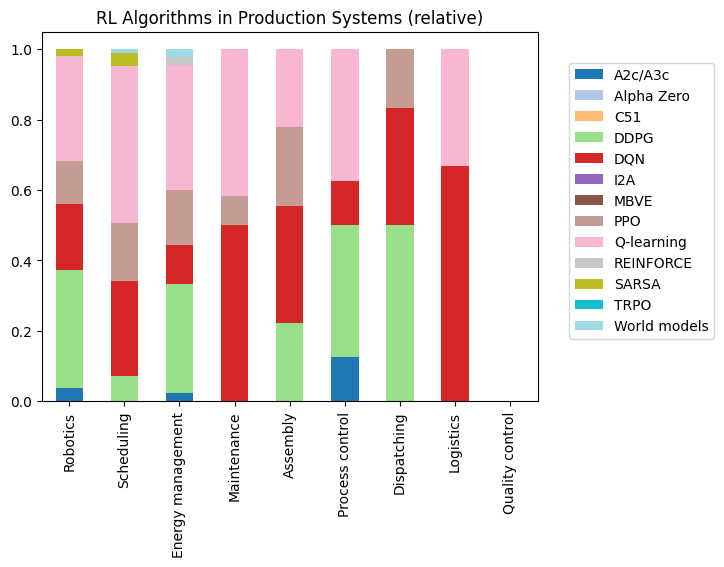

In [352]:
(df.T / df.sum(axis=1)).T.plot(kind="bar", stacked=True,color=colors)
plt.legend(bbox_to_anchor=(1.05, 0.935));
plt.title("RL Algorithms in Production Systems (relative)");

According to [Mahmood et al.](https://proceedings.mlr.press/v87/mahmood18a.html) model-free RL has proved itself as a promising approach in the field of robotics. Let's see if this holds true and how it looks for other fields in the domain of mechanical engineering.

In [356]:
def merge_dictionary(dict_1, dict_2):
   dict_3 = {**dict_1, **dict_2}
   for key, value in dict_3.items():
       if key in dict_1 and key in dict_2:
               dict_3[key] = sum([value , dict_1[key]])
   return dict_3

filtered_data_models = {k: {i: 0 for i in disciplines} for k in algorithm_classification}
for k, v in filtered_data.items():
    if k in algorithm_classification["Model-free RL"]:
        filtered_data_models["Model-free RL"] = merge_dictionary(filtered_data_models["Model-free RL"], v)
    else:
        filtered_data_models["Model-based RL"] = merge_dictionary(filtered_data_models["Model-based RL"], v)
filtered_data_models

{'Model-free RL': {'Process control': 8,
  'Scheduling': 84,
  'Assembly': 9,
  'Dispatching': 6,
  'Maintenance': 12,
  'Energy management': 43,
  'Logistics': 3,
  'Robotics': 107,
  'Quality control': 0},
 'Model-based RL': {'Process control': 0,
  'Scheduling': 1,
  'Assembly': 0,
  'Dispatching': 0,
  'Maintenance': 0,
  'Energy management': 2,
  'Logistics': 0,
  'Robotics': 0,
  'Quality control': 0}}

Now let's have a look how the trend developed in the last 10 years.

In [357]:
data = {k: {j: 0 for j in algorithms.keys()} for k in range(2013, 2023)}
for d in filtered_docs:
    year = d.doc.publication_date.year
    if 2013 <= year <= 2022:
        for alg in d.algorithms:
            data[year][alg] += 1
data

{2013: {'SARSA': 0,
  'Q-learning': 1,
  'DQN': 0,
  'C51': 0,
  'REINFORCE': 0,
  'A2c/A3c': 0,
  'DDPG': 0,
  'TRPO': 0,
  'PPO': 0,
  'MBVE': 0,
  'World models': 0,
  'I2A': 0,
  'Alpha Zero': 0},
 2014: {'SARSA': 0,
  'Q-learning': 1,
  'DQN': 0,
  'C51': 0,
  'REINFORCE': 0,
  'A2c/A3c': 0,
  'DDPG': 0,
  'TRPO': 0,
  'PPO': 0,
  'MBVE': 0,
  'World models': 0,
  'I2A': 0,
  'Alpha Zero': 0},
 2015: {'SARSA': 0,
  'Q-learning': 1,
  'DQN': 0,
  'C51': 0,
  'REINFORCE': 0,
  'A2c/A3c': 0,
  'DDPG': 0,
  'TRPO': 0,
  'PPO': 0,
  'MBVE': 0,
  'World models': 0,
  'I2A': 0,
  'Alpha Zero': 0},
 2016: {'SARSA': 1,
  'Q-learning': 4,
  'DQN': 0,
  'C51': 0,
  'REINFORCE': 0,
  'A2c/A3c': 0,
  'DDPG': 0,
  'TRPO': 0,
  'PPO': 0,
  'MBVE': 0,
  'World models': 0,
  'I2A': 0,
  'Alpha Zero': 0},
 2017: {'SARSA': 0,
  'Q-learning': 0,
  'DQN': 1,
  'C51': 0,
  'REINFORCE': 0,
  'A2c/A3c': 1,
  'DDPG': 0,
  'TRPO': 0,
  'PPO': 0,
  'MBVE': 0,
  'World models': 0,
  'I2A': 0,
  'Alpha Zero':

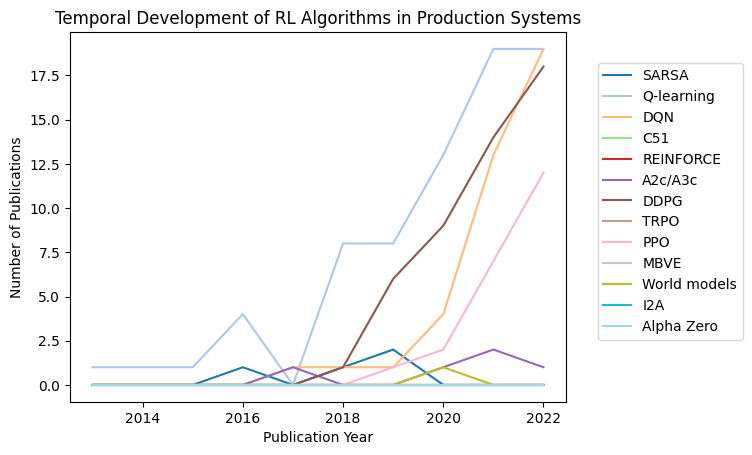

In [360]:
df_temporal_development = pd.DataFrame(data).T
df_temporal_development.plot(color = colors)
plt.title("Temporal Development of RL Algorithms in Production Systems")
plt.legend(bbox_to_anchor=(1.05, 0.935))
plt.xlabel("Publication Year")
plt.ylabel("Number of Publications");

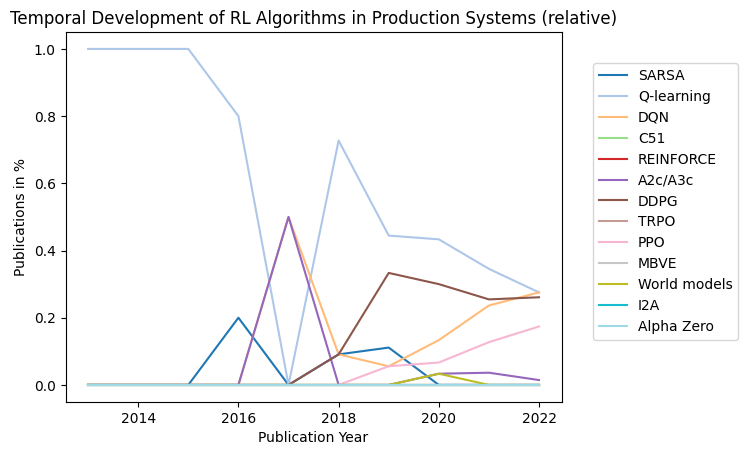

In [361]:
(df_temporal_development.T / df_temporal_development.sum(axis=1)).T.plot(color=colors)
plt.legend(bbox_to_anchor=(1.05, 0.935))
plt.title("Temporal Development of RL Algorithms in Production Systems (relative)")
plt.xlabel("Publication Year")
plt.ylabel("Publications in %");